#Introduction

In this project, We'll be working and analyzing data on movie review scores. By the end, you'll have a notebook that you can add to your portfolio or build on top of on your own. If you need help at any point, you can consult our solution notebook here.

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight.

In [1]:
import pandas as pd

movies = pd.read_csv('fandango_score_comparison.csv')
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

RottenTomatoes -- 0-100, in increments of 1.
Metacritic -- 0-100, in increments of 1.
IMDB -- 0-10, in increments of .1.
Fandango -- 0-5, in increments of .5.
Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

FILM -- the name of the movie.
RottenTomatoes -- the RottenTomatoes (RT) critic score.
RottenTomatoes_User -- the RT user score.
Metacritic -- the Metacritic critic score.
Metacritic_User -- the Metacritic user score.
IMDB -- the IMDB score given to the movie.
Fandango_Stars -- the number of stars Fandango gave the movie.
To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

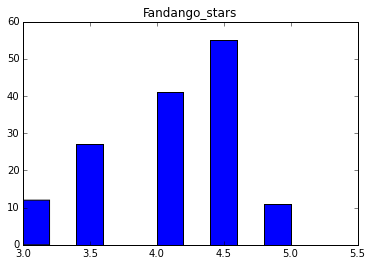

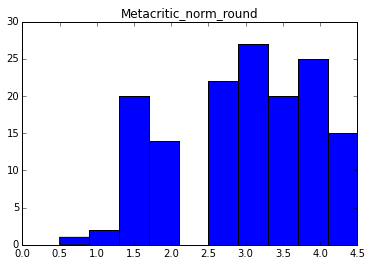

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies['Fandango_Stars'])
plt.title('Fandango_stars')
plt.show()

plt.hist(movies['Metacritic_norm_round'])
plt.title("Metacritic_norm_round")
plt.show()

In [3]:
movies['Fandango_Stars'].mean()

4.0890410958904111

In [4]:
movies['Metacritic_norm_round'].mean()

2.9726027397260273

In [5]:
movies['Fandango_Stars'].std()

0.54038597797873344

In [6]:
movies['Metacritic_norm_round'].std()

0.99096056137433586

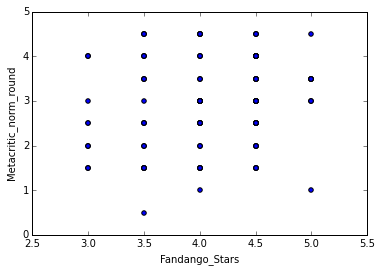

In [7]:
plt.scatter(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
plt.xlabel('Fandango_Stars')
plt.ylabel('Metacritic_norm_round')
plt.show()

In [8]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']

In [9]:
movies['fm_diff'] = abs(movies['fm_diff'])

In [10]:
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,1.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,1.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2.0


In [11]:
movies = movies.sort('fm_diff',ascending=False)

In [12]:
movies['FILM'].head(5)

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object

Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

You can then create a linear regression to see what the predicted Fandango score would be based on the Metacritic score.

In [13]:
from scipy.stats import pearsonr

In [14]:
r, p_value = pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
print (r)

0.178449190739


In [15]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(movies['Metacritic_norm_round']
                                                         ,movies['Fandango_Stars'])

In [16]:
print("r-squared:", r_value**2)

r-squared: 0.0318441136754


In [18]:
def compute_predicted_y(x):
    return x * slope + intercept

x = [3.0,4.0]
y=[]
for i in x:
    y.append(compute_predicted_y(i))
print (y)

[4.0917071528212032, 4.1890182307951322]


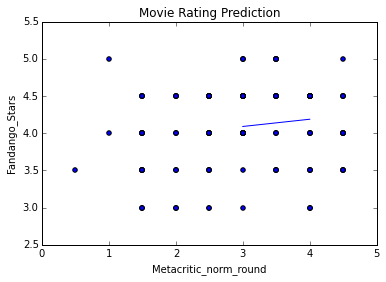

In [22]:
plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
plt.plot(x,y)
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango_Stars')
plt.title('Movie Rating Prediction')
plt.show()